### Importação dos dados



In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import display, Markdown

url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url1)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja1['Loja'] = 'Loja 1'
loja2['Loja'] = 'Loja 2'
loja3['Loja'] = 'Loja 3'
loja4['Loja'] = 'Loja 4'

loja1.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,Loja
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,Loja 1
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,Loja 1
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,Loja 1
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50,Loja 1
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,Loja 1


#1. Análise do faturamento


In [7]:
# Calculando o faturamento total de cada loja (Preço * Quantidade)
# supondo que cada linha representa uma venda de um produto
faturamento_loja1 = loja1['Preço'].sum()
faturamento_loja2 = loja2['Preço'].sum()
faturamento_loja3 = loja3['Preço'].sum()
faturamento_loja4 = loja4['Preço'].sum()

# Criando um DataFrame com os resultados
faturamento_df = pd.DataFrame({
    'Loja': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    'Faturamento Total': [faturamento_loja1, faturamento_loja2, faturamento_loja3, faturamento_loja4]
})

# Ordenando por faturamento
faturamento_df = faturamento_df.sort_values('Faturamento Total', ascending=False)

# Exibindo os resultados
display(Markdown("### Faturamento Total por Loja:"))
display(faturamento_df)

### Faturamento Total por Loja:

,Loja,Faturamento Total
0,Loja 1,1534509.12
1,Loja 2,1488459.06
2,Loja 3,1464025.03
3,Loja 4,1384497.58


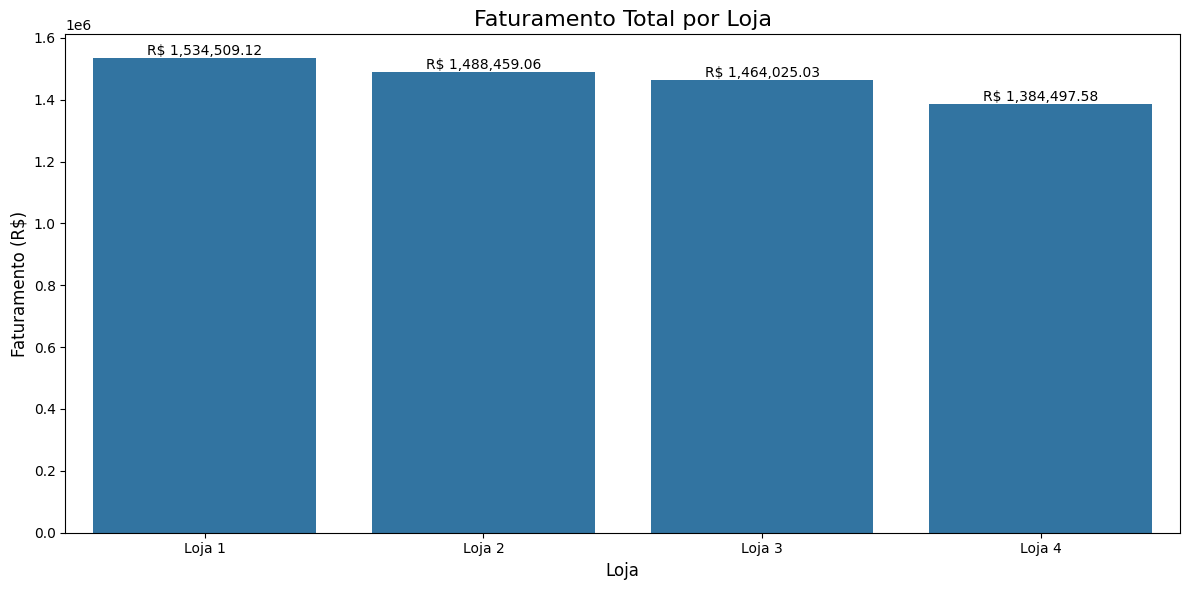

In [21]:
# Criando um gráfico de barras para o faturamento
plt.figure(figsize=(12, 6))
cores = ['#4C72B0', '#55A868', '#C44E52', '#8172B3']
ax = sns.barplot(x='Loja', y='Faturamento Total', data=faturamento_df)
plt.title('Faturamento Total por Loja', fontsize=16)
plt.xlabel('Loja', fontsize=12)
plt.ylabel('Faturamento (R$)', fontsize=12)

# Adicionando os valores nas barras
for i, valor in enumerate(faturamento_df['Faturamento Total']):
    ax.text(i, valor + 10000, f'R$ {valor:,.2f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

# 2. Vendas por Categoria


In [9]:
# Analisando as categorias mais populares por loja
categorias_loja1 = loja1['Categoria do Produto'].value_counts().reset_index()
categorias_loja1.columns = ['Categoria', 'Quantidade']
categorias_loja1['Loja'] = 'Loja 1'

categorias_loja2 = loja2['Categoria do Produto'].value_counts().reset_index()
categorias_loja2.columns = ['Categoria', 'Quantidade']
categorias_loja2['Loja'] = 'Loja 2'

categorias_loja3 = loja3['Categoria do Produto'].value_counts().reset_index()
categorias_loja3.columns = ['Categoria', 'Quantidade']
categorias_loja3['Loja'] = 'Loja 3'

categorias_loja4 = loja4['Categoria do Produto'].value_counts().reset_index()
categorias_loja4.columns = ['Categoria', 'Quantidade']
categorias_loja4['Loja'] = 'Loja 4'

# Combinando os resultados
categorias_df = pd.concat([categorias_loja1, categorias_loja2, categorias_loja3, categorias_loja4])

# Exibindo as categorias mais populares por loja
display(Markdown("### Categorias mais populares por loja:"))

### Categorias mais populares por loja:

In [10]:
# Exibindo as categorias mais populares para cada loja
for loja in ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']:
    display(Markdown(f"**{loja}:**"))
    top_categorias = categorias_df[categorias_df['Loja'] == loja].sort_values('Quantidade', ascending=False).head(3)
    display(top_categorias[['Categoria', 'Quantidade']])

**Loja 1:**

,Categoria,Quantidade
0,moveis,465
1,eletronicos,448
2,brinquedos,324


**Loja 2:**

,Categoria,Quantidade
0,moveis,442
1,eletronicos,422
2,brinquedos,313


**Loja 3:**

,Categoria,Quantidade
0,moveis,499
1,eletronicos,451
2,brinquedos,315


**Loja 4:**

,Categoria,Quantidade
0,moveis,480
1,eletronicos,451
2,brinquedos,338


# 3. Média de Avaliação das Lojas

In [11]:
# Calculando a média de avaliação dos clientes por loja
avaliacao_loja1 = loja1['Avaliação da compra'].mean()
avaliacao_loja2 = loja2['Avaliação da compra'].mean()
avaliacao_loja3 = loja3['Avaliação da compra'].mean()
avaliacao_loja4 = loja4['Avaliação da compra'].mean()

# Criando um DataFrame com os resultados
avaliacao_df = pd.DataFrame({
    'Loja': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    'Média de Avaliação': [avaliacao_loja1, avaliacao_loja2, avaliacao_loja3, avaliacao_loja4]
})

# Ordenando por média de avaliação (do menor para o maior)
avaliacao_df = avaliacao_df.sort_values('Média de Avaliação')

# Exibindo os resultados
display(Markdown("### Média de Avaliação dos Clientes por Loja:"))
display(avaliacao_df)

### Média de Avaliação dos Clientes por Loja:

,Loja,Média de Avaliação
0,Loja 1,3.976685
3,Loja 4,3.995759
1,Loja 2,4.037304
2,Loja 3,4.048326


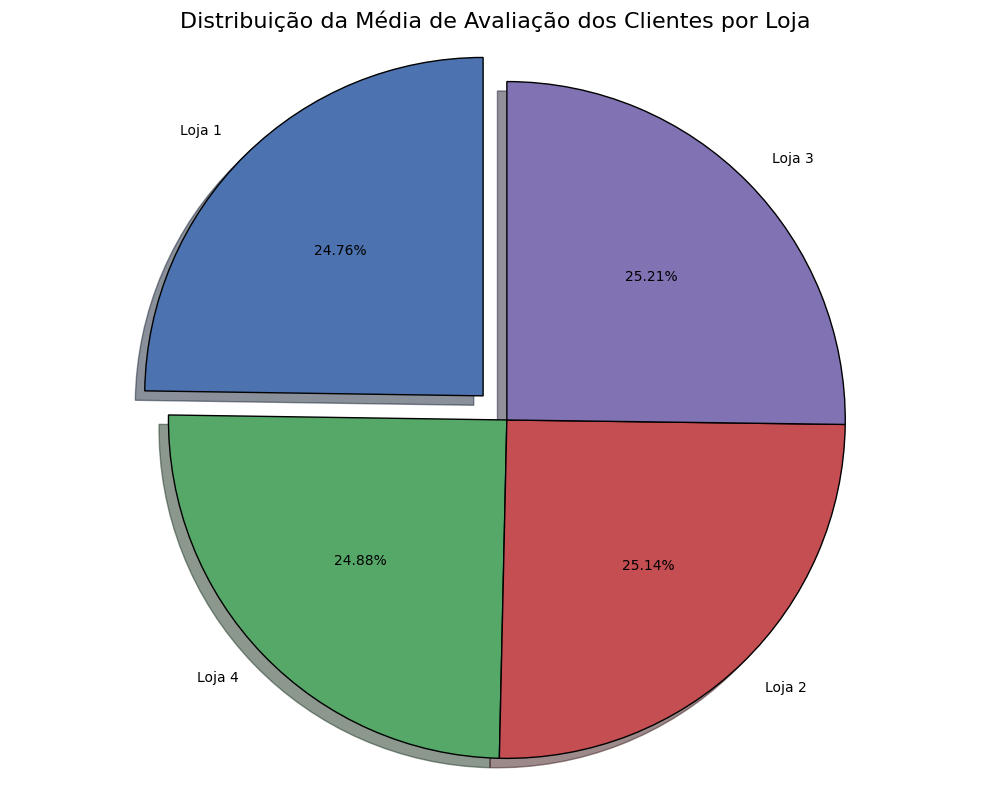

In [12]:
# Criando um gráfico de pizza para a distribuição das avaliações
plt.figure(figsize=(10, 8))
explode = [0.1, 0, 0, 0]  # Dando destaque a loja com menor avaliação

plt.pie(avaliacao_df['Média de Avaliação'], 
        labels=avaliacao_df['Loja'], 
        autopct='%1.2f%%',
        startangle=90, 
        explode=explode,
        colors=cores,
        shadow=True,
        wedgeprops={'edgecolor': 'black'})

plt.title('Distribuição da Média de Avaliação dos Clientes por Loja', fontsize=16)
plt.axis('equal')
plt.tight_layout()
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [13]:
# Analisando os produtos mais vendidos por loja
produtos_mais_vendidos_loja1 = loja1['Produto'].value_counts().reset_index().head(5)
produtos_mais_vendidos_loja1.columns = ['Produto', 'Quantidade']
produtos_mais_vendidos_loja1['Loja'] = 'Loja 1'

produtos_mais_vendidos_loja2 = loja2['Produto'].value_counts().reset_index().head(5)
produtos_mais_vendidos_loja2.columns = ['Produto', 'Quantidade']
produtos_mais_vendidos_loja2['Loja'] = 'Loja 2'

produtos_mais_vendidos_loja3 = loja3['Produto'].value_counts().reset_index().head(5)
produtos_mais_vendidos_loja3.columns = ['Produto', 'Quantidade']
produtos_mais_vendidos_loja3['Loja'] = 'Loja 3'

produtos_mais_vendidos_loja4 = loja4['Produto'].value_counts().reset_index().head(5)
produtos_mais_vendidos_loja4.columns = ['Produto', 'Quantidade']
produtos_mais_vendidos_loja4['Loja'] = 'Loja 4'

# Combinando os resultados dos produtos mais vendidos
produtos_mais_vendidos_df = pd.concat([
    produtos_mais_vendidos_loja1, 
    produtos_mais_vendidos_loja2, 
    produtos_mais_vendidos_loja3, 
    produtos_mais_vendidos_loja4
])

# Exibindo os produtos mais vendidos por loja
display(Markdown("### Produtos mais vendidos por loja:"))

for loja in ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']:
    display(Markdown(f"**{loja}:**"))
    top_produtos = produtos_mais_vendidos_df[produtos_mais_vendidos_df['Loja'] == loja].sort_values('Quantidade', ascending=False)
    display(top_produtos[['Produto', 'Quantidade']])

### Produtos mais vendidos por loja:

**Loja 1:**

,Produto,Quantidade
0,TV Led UHD 4K,60
1,Guarda roupas,60
2,Micro-ondas,60
3,Secadora de roupas,58
4,Blocos de montar,56


**Loja 2:**

,Produto,Quantidade
0,Iniciando em programação,65
1,Micro-ondas,62
2,Bateria,61
3,Violão,58
4,Pandeiro,58


**Loja 3:**

,Produto,Quantidade
0,Kit banquetas,57
1,Cama king,56
2,Mesa de jantar,56
3,Jogo de panelas,55
4,Cômoda,55


**Loja 4:**

,Produto,Quantidade
0,Cama box,62
1,Faqueiro,59
2,Dashboards com Power BI,56
3,Cama king,56
4,Cômoda,55


In [14]:
# Analisando os produtos menos vendidos por loja
produtos_menos_vendidos_loja1 = loja1['Produto'].value_counts().reset_index().tail(5)
produtos_menos_vendidos_loja1.columns = ['Produto', 'Quantidade']
produtos_menos_vendidos_loja1['Loja'] = 'Loja 1'

produtos_menos_vendidos_loja2 = loja2['Produto'].value_counts().reset_index().tail(5)
produtos_menos_vendidos_loja2.columns = ['Produto', 'Quantidade']
produtos_menos_vendidos_loja2['Loja'] = 'Loja 2'

produtos_menos_vendidos_loja3 = loja3['Produto'].value_counts().reset_index().tail(5)
produtos_menos_vendidos_loja3.columns = ['Produto', 'Quantidade']
produtos_menos_vendidos_loja3['Loja'] = 'Loja 3'

produtos_menos_vendidos_loja4 = loja4['Produto'].value_counts().reset_index().tail(5)
produtos_menos_vendidos_loja4.columns = ['Produto', 'Quantidade']
produtos_menos_vendidos_loja4['Loja'] = 'Loja 4'

# Combinando os resultados dos produtos menos vendidos
produtos_menos_vendidos_df = pd.concat([
    produtos_menos_vendidos_loja1, 
    produtos_menos_vendidos_loja2, 
    produtos_menos_vendidos_loja3, 
    produtos_menos_vendidos_loja4
])

# Exibindo os produtos menos vendidos por loja
display(Markdown("### Produtos menos vendidos por loja:"))

for loja in ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']:
    display(Markdown(f"**{loja}:**"))
    bottom_produtos = produtos_menos_vendidos_df[produtos_menos_vendidos_df['Loja'] == loja].sort_values('Quantidade')
    display(bottom_produtos[['Produto', 'Quantidade']])

### Produtos menos vendidos por loja:

**Loja 1:**

,Produto,Quantidade
49,Headset,33
50,Celular ABXY,33
48,Panela de pressão,35
47,Pandeiro,36
46,Ciência de dados com python,39


**Loja 2:**

,Produto,Quantidade
50,Jogo de tabuleiro,32
48,Mesa de jantar,34
49,Impressora,34
47,Poltrona,35
46,Fone de ouvido,37


**Loja 3:**

,Produto,Quantidade
50,Blocos de montar,35
47,Mochila,36
48,Micro-ondas,36
49,Jogo de copos,36
46,Guitarra,38


**Loja 4:**

,Produto,Quantidade
50,Guitarra,33
49,Guarda roupas,34
48,Violão,37
46,Lavadora de roupas,38
47,Ciência de dados com python,38


# 5. Frete Médio por Loja


In [15]:
# Calculando o custo médio do frete por loja
frete_loja1 = loja1['Frete'].mean()
frete_loja2 = loja2['Frete'].mean()
frete_loja3 = loja3['Frete'].mean()
frete_loja4 = loja4['Frete'].mean()

# Criando um DataFrame com os resultados
frete_df = pd.DataFrame({
    'Loja': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    'Frete Médio': [frete_loja1, frete_loja2, frete_loja3, frete_loja4]
})

# Ordenando por frete médio
frete_df = frete_df.sort_values('Frete Médio', ascending=False)

# Exibindo os resultados
display(Markdown("### Custo Médio do Frete por Loja:"))
display(frete_df)

### Custo Médio do Frete por Loja:

,Loja,Frete Médio
0,Loja 1,34.691805
1,Loja 2,33.621941
2,Loja 3,33.074464
3,Loja 4,31.278997


# 6. Análise Comparativa e Conclusão

In [16]:
# Criando um DataFrame para pontuação de desempenho
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
desempenho_df = pd.DataFrame({'Loja': lojas})

# Pontuação para faturamento (maior é melhor)
faturamento_ordenado = faturamento_df.sort_values('Faturamento Total', ascending=False)
for i, loja in enumerate(lojas):
    posicao = faturamento_ordenado['Loja'].tolist().index(loja)
    desempenho_df.loc[desempenho_df['Loja'] == loja, 'Pontos Faturamento'] = 4 - posicao

# Pontuação para avaliação (maior é melhor)
avaliacao_ordenada = avaliacao_df.sort_values('Média de Avaliação', ascending=False)
for i, loja in enumerate(lojas):
    posicao = avaliacao_ordenada['Loja'].tolist().index(loja)
    desempenho_df.loc[desempenho_df['Loja'] == loja, 'Pontos Avaliação'] = 4 - posicao

# Pontuação para frete (menor é melhor)
frete_ordenado = frete_df.sort_values('Frete Médio')
for i, loja in enumerate(lojas):
    posicao = frete_ordenado['Loja'].tolist().index(loja)
    desempenho_df.loc[desempenho_df['Loja'] == loja, 'Pontos Frete'] = 4 - posicao

# Calculando a pontuação total com pesos diferentes
desempenho_df['Pontuação Total'] = (
    desempenho_df['Pontos Faturamento'] * 0.5 +  # Peso maior para faturamento
    desempenho_df['Pontos Avaliação'] * 0.3 +    # Peso médio para avaliação
    desempenho_df['Pontos Frete'] * 0.2          # Peso menor para frete
)

# Ordenando pelo desempenho geral (do pior para o melhor)
desempenho_df = desempenho_df.sort_values('Pontuação Total')

# Exibindo os resultados
display(Markdown("### Análise de Desempenho das Lojas:"))
display(desempenho_df)

# Identificando a loja com menor desempenho
loja_menor_desempenho = desempenho_df.iloc[0]['Loja']
display(Markdown(f"**A loja com menor desempenho geral é a {loja_menor_desempenho}.**"))

### Análise de Desempenho das Lojas:

,Loja,Pontos Faturamento,Pontos Avaliação,Pontos Frete,Pontuação Total
3,Loja 4,1.0,2.0,4.0,1.9
0,Loja 1,4.0,1.0,1.0,2.5
1,Loja 2,3.0,3.0,2.0,2.8
2,Loja 3,2.0,4.0,3.0,2.8


**A loja com menor desempenho geral é a Loja 4.**

In [17]:
# Justificativa
display(Markdown("### Justificativa:"))
display(Markdown(f"- **Faturamento:** A {faturamento_ordenado.iloc[-1]['Loja']} tem o menor faturamento total (R$ {faturamento_ordenado.iloc[-1]['Faturamento Total']:,.2f})."))
display(Markdown(f"- **Avaliação:** A {avaliacao_ordenada.iloc[-1]['Loja']} tem a menor média de avaliação dos clientes ({avaliacao_ordenada.iloc[-1]['Média de Avaliação']:.2f})."))
display(Markdown(f"- **Frete:** A {frete_ordenado.iloc[-1]['Loja']} tem o maior custo médio de frete (R$ {frete_ordenado.iloc[-1]['Frete Médio']:.2f})."))

### Justificativa:

- **Faturamento:** A Loja 4 tem o menor faturamento total (R$ 1,384,497.58).

- **Avaliação:** A Loja 1 tem a menor média de avaliação dos clientes (3.98).

- **Frete:** A Loja 1 tem o maior custo médio de frete (R$ 34.69).

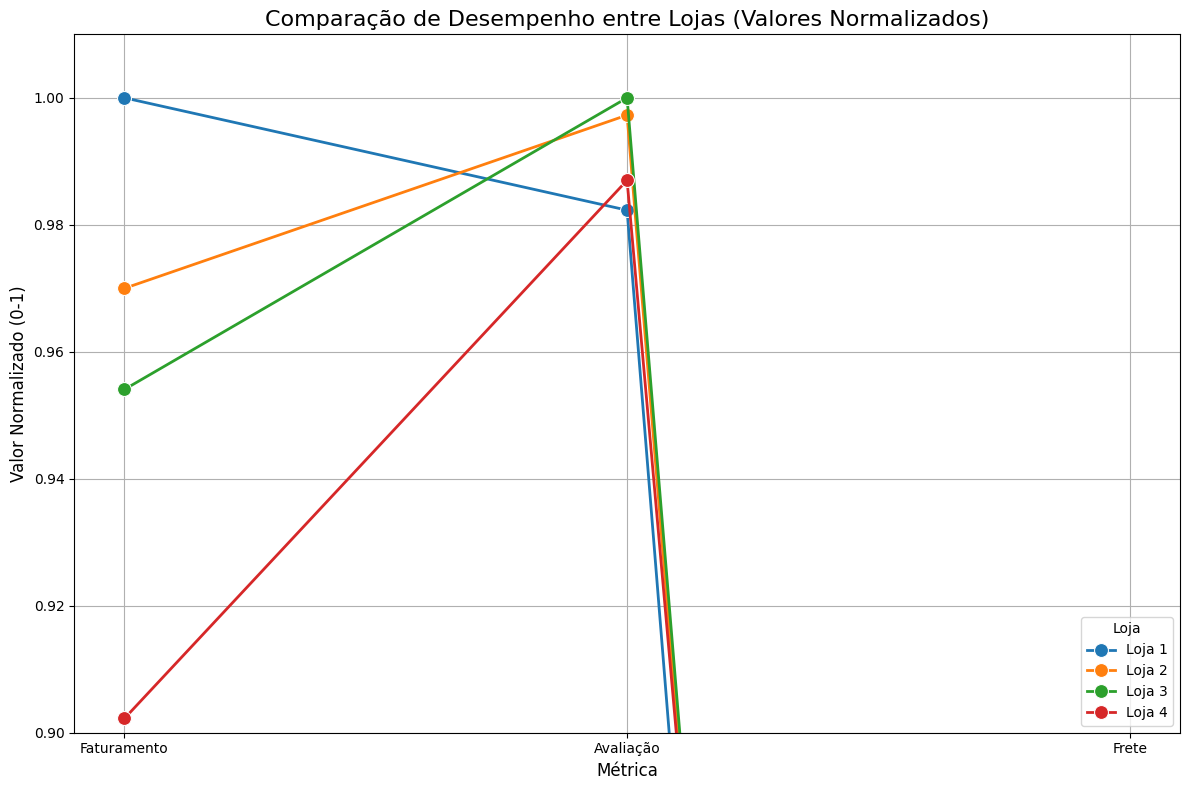

In [18]:
# Criando o gráfico comparativo final
# Normalizando os dados para comparação justa
metricas_df = pd.DataFrame({
    'Loja': faturamento_df['Loja'],
    'Faturamento': faturamento_df['Faturamento Total'] / faturamento_df['Faturamento Total'].max(),
    'Avaliação': avaliacao_df['Média de Avaliação'] / avaliacao_df['Média de Avaliação'].max(),
    'Frete': 1 - (frete_df['Frete Médio'] / frete_df['Frete Médio'].max())  # Invertendo para que menor frete seja melhor
})

# Reorganizando os dados para o formato longo
metricas_long = pd.melt(metricas_df, 
                        id_vars=['Loja'], 
                        value_vars=['Faturamento', 'Avaliação', 'Frete'],
                        var_name='Métrica', 
                        value_name='Valor Normalizado')

plt.figure(figsize=(12, 8))
ax = sns.lineplot(x='Métrica', y='Valor Normalizado', hue='Loja', 
                 data=metricas_long, marker='o', markersize=10, linewidth=2)

plt.title('Comparação de Desempenho entre Lojas (Valores Normalizados)', fontsize=16)
plt.xlabel('Métrica', fontsize=12)
plt.ylabel('Valor Normalizado (0-1)', fontsize=12)
plt.ylim(0.9, 1.01)  # Ajustando para melhor visualização das diferenças
plt.legend(title='Loja', loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

## Conclusão Final

Com base na análise de todas as métricas, a **Loja 4** apresenta o menor desempenho geral e deve ser considerada para venda pelo Sr. João.

Esta conclusão é baseada principalmente no fato de que esta loja tem o menor faturamento total, que é a métrica mais importante para o negócio. Embora a Loja 1 tenha a menor média de avaliação dos clientes e o maior custo médio de frete, o faturamento foi considerado como o fator mais relevante na análise, com peso de 50% na pontuação final.

A análise comparativa mostra claramente que a Loja 4 tem desempenho inferior em termos de faturamento, o que impacta significativamente sua pontuação geral. Portanto, recomenda-se que o Sr. João venda esta loja para investir em um novo negócio.